In [1]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [11]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
%matplotlib inline

In [12]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [13]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [14]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [15]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [16]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [17]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.081526309 W= 0.212215 b= 1.07036
Epoch: 0100 cost= 0.081005983 W= 0.214439 b= 1.05437
Epoch: 0150 cost= 0.080545537 W= 0.216529 b= 1.03933
Epoch: 0200 cost= 0.080138028 W= 0.218496 b= 1.02518
Epoch: 0250 cost= 0.079777412 W= 0.220345 b= 1.01188
Epoch: 0300 cost= 0.079458192 W= 0.222085 b= 0.999362
Epoch: 0350 cost= 0.079175718 W= 0.223721 b= 0.987592
Epoch: 0400 cost= 0.078925677 W= 0.22526 b= 0.976521
Epoch: 0450 cost= 0.078704357 W= 0.226707 b= 0.966108
Epoch: 0500 cost= 0.078508481 W= 0.228069 b= 0.956315
Epoch: 0550 cost= 0.078335181 W= 0.229349 b= 0.947108
Epoch: 0600 cost= 0.078181729 W= 0.230552 b= 0.938448
Epoch: 0650 cost= 0.078045897 W= 0.231685 b= 0.930301
Epoch: 0700 cost= 0.077925622 W= 0.23275 b= 0.92264
Epoch: 0750 cost= 0.077819139 W= 0.233751 b= 0.915434
Epoch: 0800 cost= 0.077724859 W= 0.234693 b= 0.908657
Epoch: 0850 cost= 0.077641405 W= 0.23558 b= 0.902282
Epoch: 0900 cost= 0.077567466 W= 0.236413 b= 0.896287
Epoch: 0950 cost= 0.077502020 W= 0.23

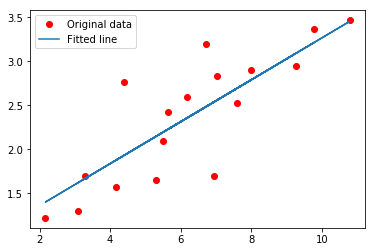

In [18]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                  "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [19]:
# Regression result